In [172]:
import pandas as pd
from sklearn.impute import SimpleImputer

df = pd.read_csv(r"C:\Users\ayu_r\OneDrive\Desktop\ass1.csv")
df.head()

,#,From,To (Interval: 15M),PM10 (µg/m3),PM2.5 (µg/m3),NO (µg/m3),NO2 (µg/m3),NOX (ppb),CO (mg/m3),SO2 (µg/m3),NH3 (µg/m3),Ozone (µg/m3),Benzene (µg/m3)
0,1,2/1/2023 0:00,2/1/2023 0:15,95.0,35.0,NaN,90.1,56.2,0.31,NaN,17.7,28.1,0.4
1,2,2/1/2023 0:15,2/1/2023 0:30,95.0,35.0,NaN,88.0,55.1,0.33,NaN,18.3,27.1,0.4
2,3,2/1/2023 0:30,2/1/2023 0:45,95.0,35.0,NaN,87.7,55.2,0.38,NaN,19.7,24.9,0.4
3,4,2/1/2023 0:45,2/1/2023 1:00,122.0,34.0,NaN,88.9,55.7,0.38,NaN,21.3,21.9,0.4
4,5,2/1/2023 1:00,2/1/2023 1:15,122.0,34.0,NaN,90.0,55.8,0.38,NaN,22.3,16.7,0.4


In [173]:
import pandas as pd


# Columns to interpolate
columns_to_interpolate = ['PM10 (µg/m3)', 'PM2.5 (µg/m3)', 'NO (µg/m3)', 'NO2 (µg/m3)', 'NOX (ppb)', 'CO (mg/m3)', 'SO2 (µg/m3)', 'NH3 (µg/m3)', 'Ozone (µg/m3)', 'Benzene (µg/m3)']

# Perform linear interpolation for the selected columns
df[columns_to_interpolate] = df[columns_to_interpolate].interpolate(method='linear', limit_direction='both')

# Print the updated DataFrame
print(df)


         #            From To (Interval: 15M)  PM10 (µg/m3)  PM2.5 (µg/m3)  \
0        1   2/1/2023 0:00      2/1/2023 0:15          95.0           35.0   
1        2   2/1/2023 0:15      2/1/2023 0:30          95.0           35.0   
2        3   2/1/2023 0:30      2/1/2023 0:45          95.0           35.0   
3        4   2/1/2023 0:45      2/1/2023 1:00         122.0           34.0   
4        5   2/1/2023 1:00      2/1/2023 1:15         122.0           34.0   
...    ...             ...                ...           ...            ...   
8635  8636  5/1/2023 22:45     5/1/2023 23:00          19.0           11.0   
8636  8637  5/1/2023 23:00     5/1/2023 23:15          19.0           11.0   
8637  8638  5/1/2023 23:15     5/1/2023 23:30          19.0           11.0   
8638  8639  5/1/2023 23:30     5/1/2023 23:45          19.0           11.0   
8639  8640  5/1/2023 23:45      5/2/2023 0:00          32.0            6.0   

      NO (µg/m3)  NO2 (µg/m3)  NOX (ppb)  CO (mg/m3)  SO2 (µg/m

In [174]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8640 entries, 0 to 8639
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   #                   8640 non-null   int64  
 1   From                8640 non-null   object 
 2   To (Interval: 15M)  8640 non-null   object 
 3   PM10 (µg/m3)        8640 non-null   float64
 4   PM2.5 (µg/m3)       8640 non-null   float64
 5   NO (µg/m3)          8640 non-null   float64
 6   NO2 (µg/m3)         8640 non-null   float64
 7   NOX (ppb)           8640 non-null   float64
 8   CO (mg/m3)          8640 non-null   float64
 9   SO2 (µg/m3)         8640 non-null   float64
 10  NH3 (µg/m3)         8640 non-null   float64
 11  Ozone (µg/m3)       8640 non-null   float64
 12  Benzene (µg/m3)     8640 non-null   float64
dtypes: float64(10), int64(1), object(2)
memory usage: 877.6+ KB


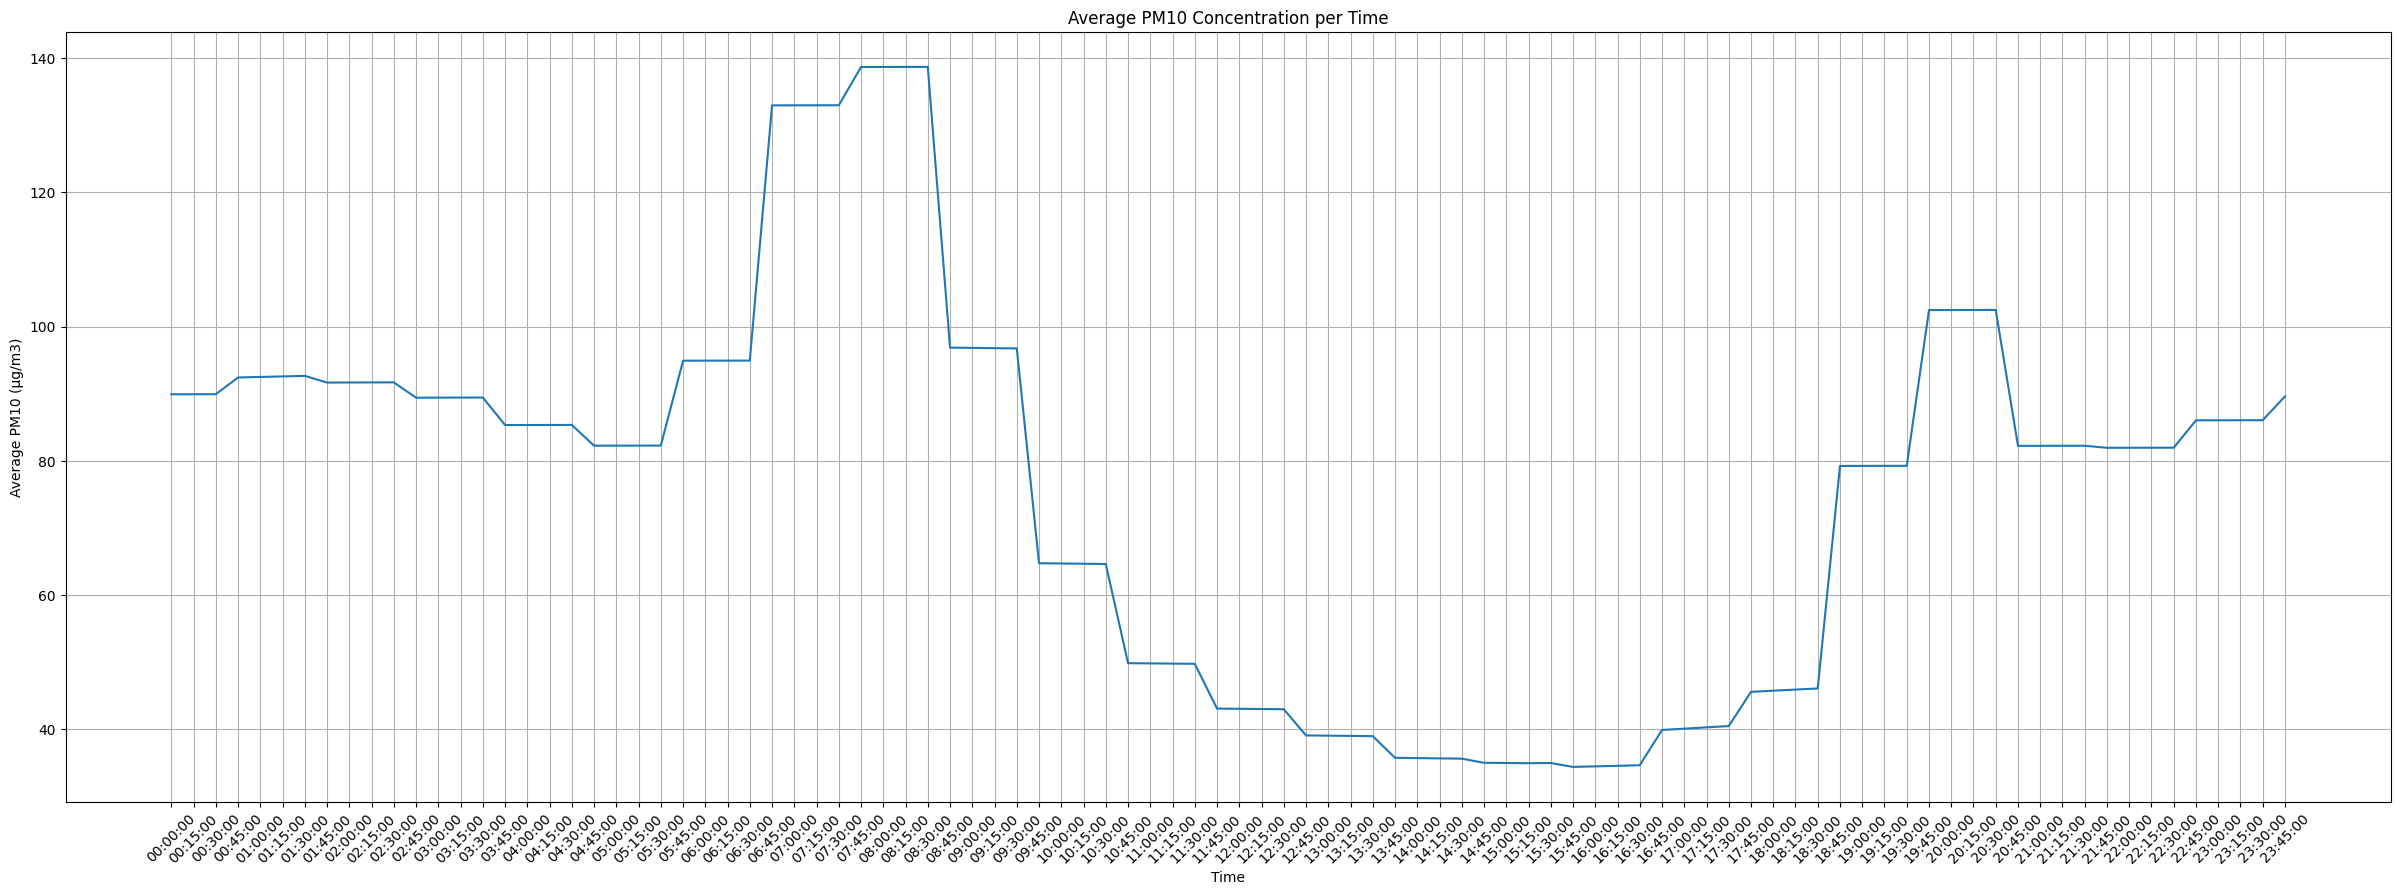

In [229]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
df = pd.read_csv(r"C:\Users\ayu_r\OneDrive\Desktop\jupyter\liner.csv")

# Convert 'From' column to datetime format
df['From'] = pd.to_datetime(df['From'], format='%m/%d/%Y %H:%M')

# Extract the time component from the 'From' column
df['Time'] = df['From'].dt.time

# Group the DataFrame by the unique time values
grouped = df.groupby('Time')

# Calculate the sum of the pollutant column for each unique time
sum_per_time = grouped['PM2.5 (µg/m3)'].sum()

# Calculate the average of the sum for each unique time
avg_per_time = sum_per_time / grouped.size()

# Convert time values to strings
time_str = [str(time) for time in avg_per_time.index]

# Create a graph with the average of each time
plt.figure(figsize=(30,10))
plt.plot(time_str, avg_per_time.values)
plt.xlabel('Time')
plt.ylabel('Average PM10 (µg/m3)')
plt.title('Average PM10 Concentration per Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()



In [230]:
import pandas as pd

# Filter the DataFrame for the desired time range
start_time = pd.to_datetime('7:30').time()
end_time = pd.to_datetime('8:15').time()
filtered_df = df[(df['Time'] >= start_time) & (df['Time'] <= end_time)]

# Calculate the average PM2.5 concentration during the time range
average_pm25 = filtered_df['PM2.5 (µg/m3)'].mean()

print("Average PM2.5 concentration during 7:30-8:15:", average_pm25)


Average PM2.5 concentration during 7:30-8:15: 137.29372427983333


In [231]:
import pandas as pd

# Filter the DataFrame for the desired time range
start_time = pd.to_datetime('00:00').time()
end_time = pd.to_datetime('23:45').time()
filtered_df = df[(df['Time'] >= start_time) & (df['Time'] <= end_time)]

# Calculate the average PM2.5 concentration during the time range
average_pm25 = filtered_df['PM2.5 (µg/m3)'].mean()

print("Average PM2.5 concentration during 7:30-8:15:", average_pm25)


Average PM2.5 concentration during 7:30-8:15: 75.55734953702314


In [232]:
import pandas as pd

# Filter the DataFrame for the desired time range
start_time = pd.to_datetime('13:45').time()
end_time = pd.to_datetime('14:45').time()
filtered_df = df[(df['Time'] >= start_time) & (df['Time'] <= end_time)]

# Calculate the average PM2.5 concentration during the time range
average_pm25 = filtered_df['PM2.5 (µg/m3)'].mean()

print("Average PM2.5 concentration during 7:30-8:15:", average_pm25)


Average PM2.5 concentration during 7:30-8:15: 35.47157481584889


In [233]:
import pandas as pd

# Define the time range to exclude
exclude_start_time = pd.to_datetime('07:15').time()
exclude_end_time = pd.to_datetime('08:30').time()

# Filter the DataFrame for the desired time range excluding the specified range
start_time = pd.to_datetime('00:00').time()
end_time = pd.to_datetime('23:45').time()
filtered_df = df[(df['Time'] >= start_time) & (df['Time'] <= end_time) & ~((df['Time'] >= exclude_start_time) & (df['Time'] <= exclude_end_time))]

# Calculate the average PM2.5 concentration during the filtered time range
average_pm25 = filtered_df['PM2.5 (µg/m3)'].mean()

print("Average PM2.5 concentration during 00:00-23:45 (excluding 07:15-08:30):", average_pm25)


Average PM2.5 concentration during 00:00-23:45 (excluding 07:15-08:30): 71.47325788750247


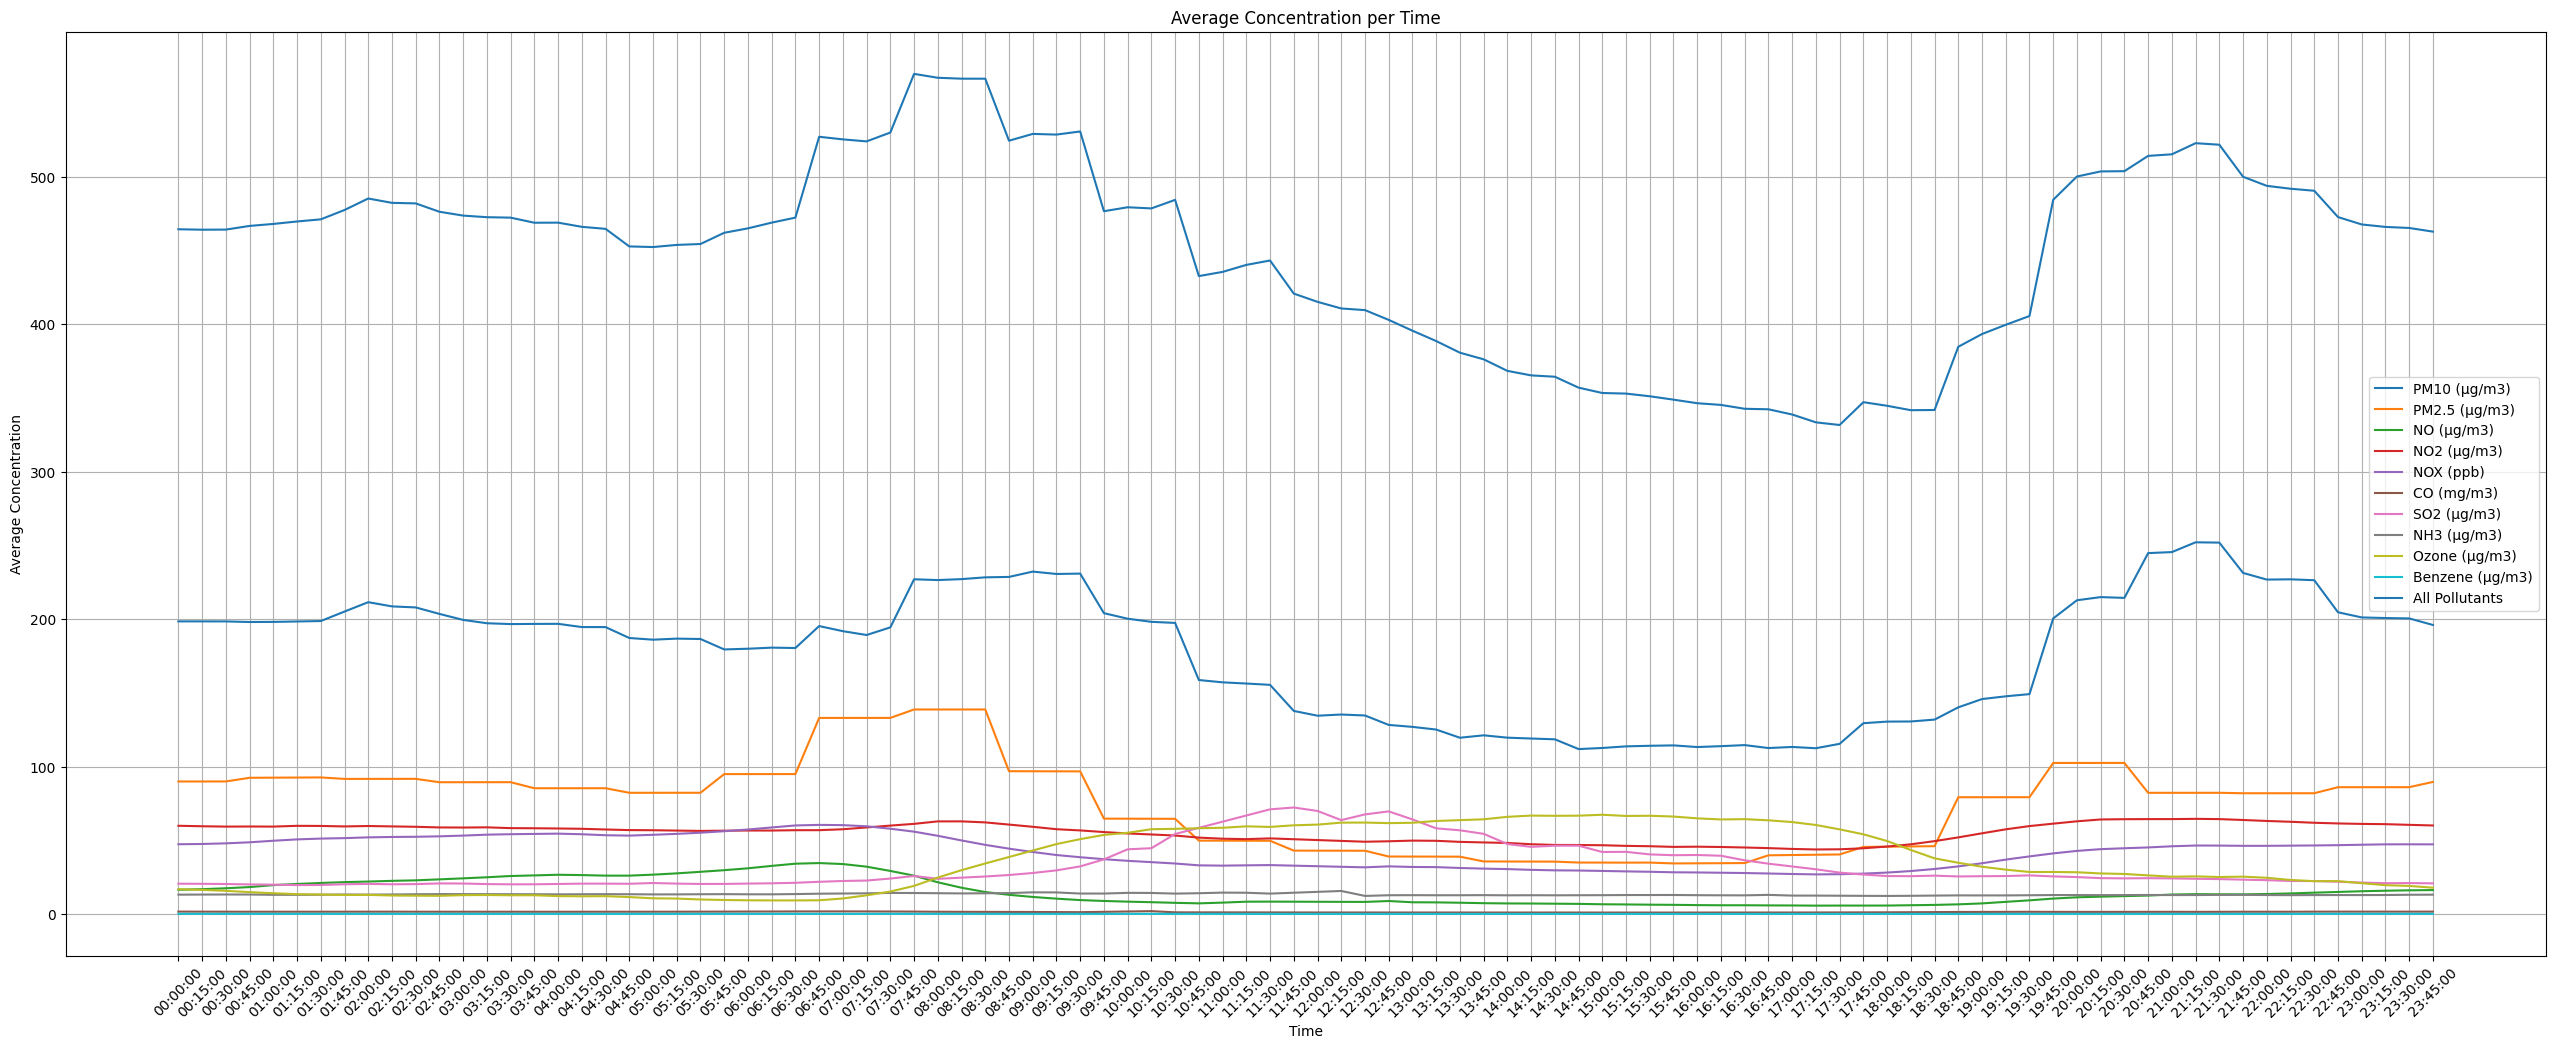

In [177]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
df = pd.read_csv(r"C:\Users\ayu_r\OneDrive\Desktop\jupyter\liner.csv")
# Convert 'From' column to datetime format
df['From'] = pd.to_datetime(df['From'], format='%m/%d/%Y %H:%M')

# Extract the time component from the 'From' column
df['Time'] = df['From'].dt.time

# Define the columns to plot
columns_to_plot = ['PM10 (µg/m3)', 'PM2.5 (µg/m3)', 'NO (µg/m3)', 'NO2 (µg/m3)', 'NOX (ppb)', 'CO (mg/m3)', 'SO2 (µg/m3)', 'NH3 (µg/m3)', 'Ozone (µg/m3)', 'Benzene (µg/m3)','All Pollutants']

# Group the DataFrame by the unique time values
grouped = df.groupby('Time')

# Create a figure and axes
fig, ax = plt.subplots(figsize=(32, 12))

# Iterate over the columns and plot average concentration per time
for column in columns_to_plot:
    # Calculate the sum of the column for each unique time
    sum_per_time = grouped[column].sum()

    # Calculate the average of the sum for each unique time
    avg_per_time = sum_per_time / grouped.size()

    # Convert time values to strings
    time_str = [str(time) for time in avg_per_time.index]

    # Plot the average concentration per time for the current column
    ax.plot(time_str, avg_per_time.values, label=column)

# Set the x-axis label
ax.set_xlabel('Time')

# Set the y-axis label
ax.set_ylabel('Average Concentration')

# Set the title
ax.set_title('Average Concentration per Time')

# Rotate x-axis tick labels for better readability
plt.xticks(rotation=45)

# Add a legend
ax.legend()

# Show the plot
# plt.figure(figsize=(30,10))
plt.grid('TRUE')
plt.show()


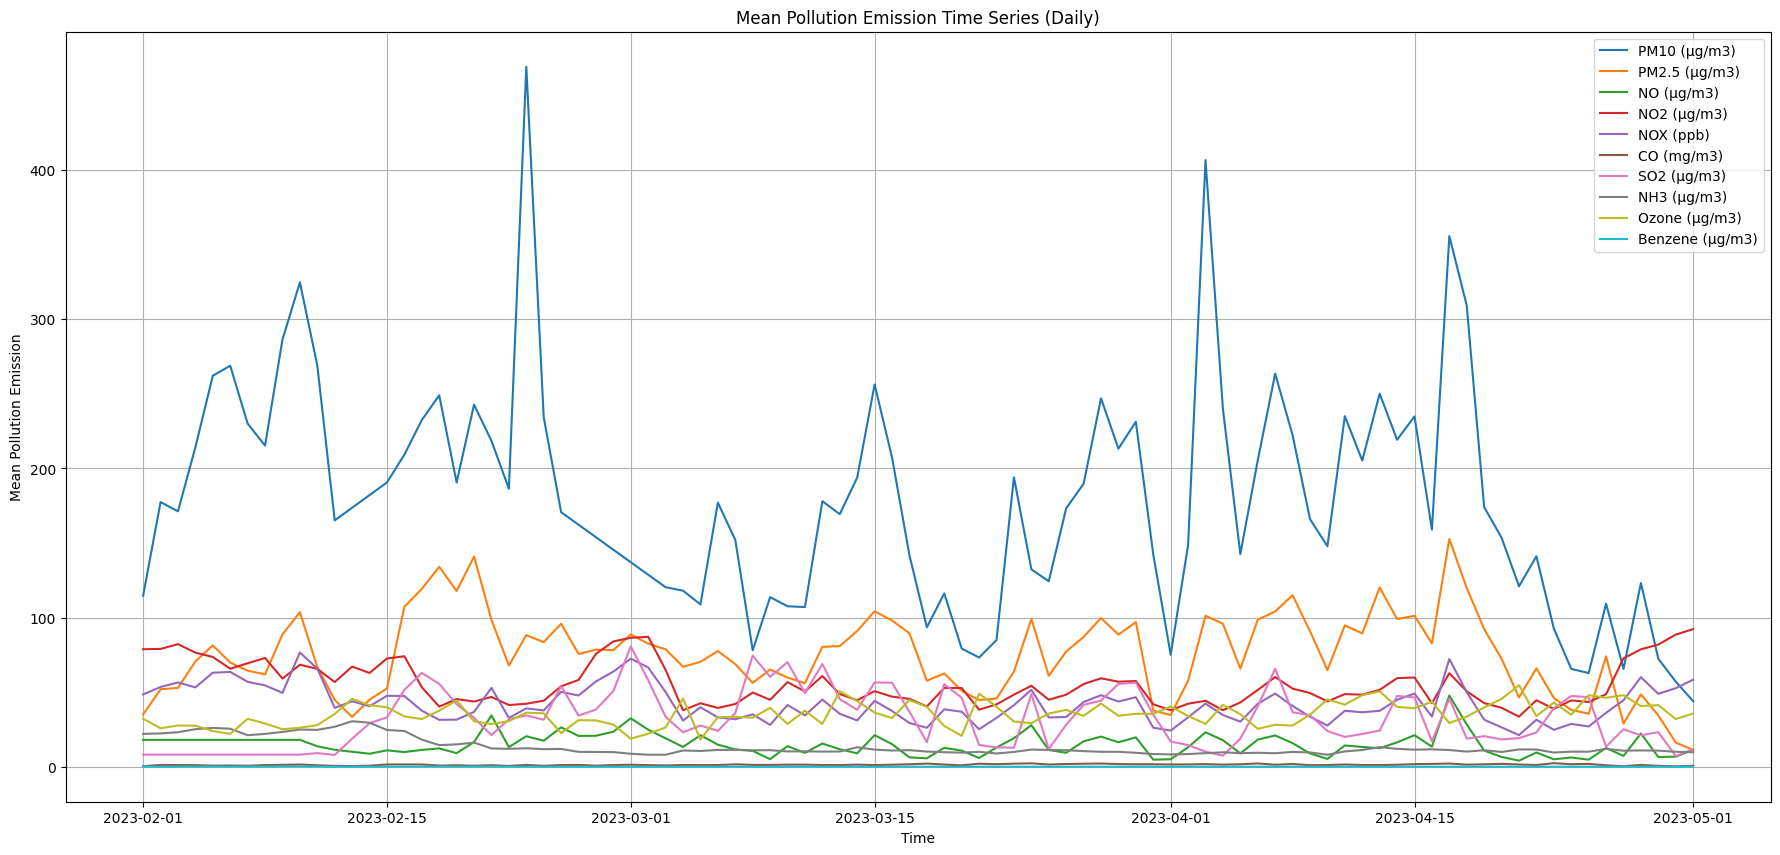

In [85]:
import matplotlib.pyplot as plt

# Convert 'From' column to datetime format
df['From'] = pd.to_datetime(df['From'], format='%m/%d/%Y %H:%M')

# Set the 'From' column as the index of the DataFrame
df.set_index('From', inplace=True)

# Columns to plot
columns_to_plot = ['PM10 (µg/m3)', 'PM2.5 (µg/m3)', 'NO (µg/m3)', 'NO2 (µg/m3)', 'NOX (ppb)', 'CO (mg/m3)', 'SO2 (µg/m3)', 'NH3 (µg/m3)', 'Ozone (µg/m3)', 'Benzene (µg/m3)']

# Plotting the mean pollution emission time series for each column
plt.figure(figsize=(22, 10))
for column in columns_to_plot:
    df_daily_mean = df[column].resample('D').mean()
    plt.plot(df_daily_mean.index, df_daily_mean.values, label=column)

plt.xlabel('Time')
plt.ylabel('Mean Pollution Emission')
plt.title('Mean Pollution Emission Time Series (Daily)')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Convert 'From' column to datetime format
df['From'] = pd.to_datetime(df['From'], format='%m/%d/%Y %H:%M')

# Set the 'From' column as the index of the DataFrame
df.set_index('From', inplace=True)

# Columns to plot
columns_to_plot = ['PM10 (µg/m3)', 'PM2.5 (µg/m3)', 'NO (µg/m3)', 'NO2 (µg/m3)', 'NOX (ppb)', 'CO (mg/m3)', 'SO2 (µg/m3)', 'NH3 (µg/m3)', 'Ozone (µg/m3)', 'Benzene (µg/m3)']

# Plotting the mean pollution emission time series for each column
plt.figure(figsize=(22, 6))
for column in columns_to_plot:
    df_daily_mean = df[column].resample('D').mean()
    plt.plot(df_daily_mean.index, df_daily_mean.values, label=column)

plt.xlabel('Time')
plt.ylabel('Mean Pollution Emission')
plt.title('Mean Pollution Emission Time Series (Daily)')
plt.legend()
plt.grid(True)
plt.show()


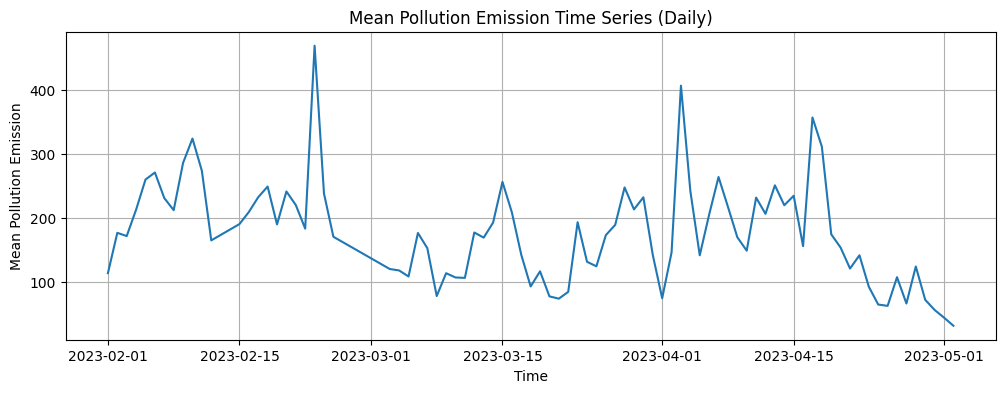

In [35]:
import matplotlib.pyplot as plt
df['To (Interval: 15M)'] = pd.to_datetime(df['To (Interval: 15M)'], format='%m/%d/%Y %H:%M')

# Set the 'From' column as the index of the DataFrame
df.set_index('To (Interval: 15M)', inplace=True)

# Resample the data to daily mean
df_daily_mean = df['PM10 (µg/m3)'].resample('D').mean()

# Plotting the time series
plt.figure(figsize=(12, 4))
plt.plot(df_daily_mean.index, df_daily_mean.values)
plt.xlabel('Time')
plt.ylabel('Mean Pollution Emission')
plt.title('Mean Pollution Emission Time Series (Daily)')
plt.grid(True)
plt.show()



In [67]:


# Define the columns to fill null values
columns_to_fill = ['PM10 (µg/m3)', 'PM2.5 (µg/m3)', 'NO2 (µg/m3)', 'NOX (ppb)', 'CO (mg/m3)', 'NH3 (µg/m3)', 'Ozone (µg/m3)', 'Benzene (µg/m3)']

# Perform linear interpolation for the specified columns
df[columns_to_fill] = df[columns_to_fill].interpolate(method='linear')

# Print the updated DataFrame
print(df)


         #            From To (Interval: 15M)  PM10 (µg/m3)  PM2.5 (µg/m3)  \
0        1   2/1/2023 0:00      2/1/2023 0:15          95.0           35.0   
1        2   2/1/2023 0:15      2/1/2023 0:30          95.0           35.0   
2        3   2/1/2023 0:30      2/1/2023 0:45          95.0           35.0   
3        4   2/1/2023 0:45      2/1/2023 1:00         122.0           34.0   
4        5   2/1/2023 1:00      2/1/2023 1:15         122.0           34.0   
...    ...             ...                ...           ...            ...   
8635  8636  5/1/2023 22:45     5/1/2023 23:00          19.0           11.0   
8636  8637  5/1/2023 23:00     5/1/2023 23:15          19.0           11.0   
8637  8638  5/1/2023 23:15     5/1/2023 23:30          19.0           11.0   
8638  8639  5/1/2023 23:30     5/1/2023 23:45          19.0           11.0   
8639  8640  5/1/2023 23:45      5/2/2023 0:00          32.0            6.0   

      NO (µg/m3)  NO2 (µg/m3)  NOX (ppb)  CO (mg/m3)  SO2 (µg/m

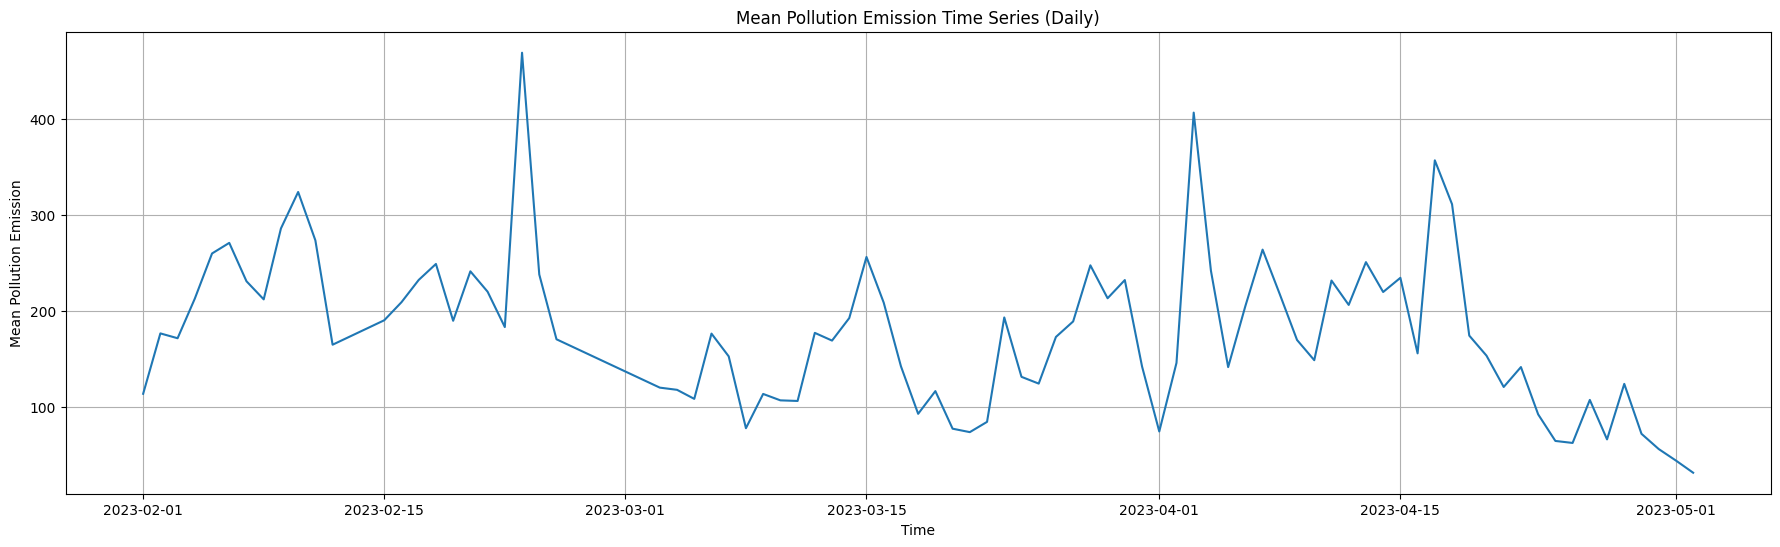

In [18]:
import matplotlib.pyplot as plt
df['To (Interval: 15M)'] = pd.to_datetime(df['To (Interval: 15M)'], format='%m/%d/%Y %H:%M')

# Set the 'From' column as the index of the DataFrame
df.set_index('To (Interval: 15M)', inplace=True)

# Resample the data to daily mean
df_daily_mean = df['PM10 (µg/m3)'].resample('D').mean()

# Plotting the time series
plt.figure(figsize=(22, 6))
plt.plot(df_daily_mean.index, df_daily_mean.values)
plt.xlabel('Time')
plt.ylabel('Mean Pollution Emission')
plt.title('Mean Pollution Emission Time Series (Daily)')
plt.grid(True)
plt.show()



In [205]:
import pandas as pd

# Load your dataset
df = pd.read_csv(r"C:\Users\ayu_r\OneDrive\Desktop\jupyter\liner.csv")

# Convert 'From' column to datetime format
df['From'] = pd.to_datetime(df['From'], format='%m/%d/%Y %H:%M')

# Set 'From' column as the index
df.set_index('From', inplace=True)

# Resample each column to daily average
df_daily_avg = df.resample('D').mean()
df_daily_avg.to_csv("daily_average_data.csv")

# Print the daily average dataframe
print(df_daily_avg)


                 #  PM10 (µg/m3)  PM2.5 (µg/m3)  NO (µg/m3)  NO2 (µg/m3)  \
From                                                                       
2023-02-01    48.5    114.739583      35.145833   18.100000    78.850000   
2023-02-02   144.5    177.458333      52.020833   18.100000    79.049479   
2023-02-03   240.5    171.270833      52.916667   18.100000    82.247396   
2023-02-04   336.5    214.239583      70.703125   18.100000    76.579687   
2023-02-05   432.5    262.171875      81.437500   18.100000    73.644271   
...            ...           ...            ...         ...          ...   
2023-04-27  8208.5     65.645833      29.031250    7.333333    72.735937   
2023-04-28  8304.5    123.281250      48.572917   22.408854    78.778125   
2023-04-29  8400.5     72.458333      34.479167    6.615104    81.954167   
2023-04-30  8496.5     57.135417      16.281250    6.853125    88.653125   
2023-05-01  8592.5     44.020833      11.375000   11.435417    92.310417   

           

C:\Users\ayu_r\AppData\Local\Temp\ipykernel_30488\994322635.py:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_daily_avg = df.resample('D').mean()


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

# Load your dataset
df = pd.read_csv("daily_average_data.csv")

# Assuming your time series data is in a column named 'Value'
data = df['All Pollutants']

# Plot PACF
plt.figure(figsize=(12, 6))
plot_pacf(data, lags=30)
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

# Plot ACF
plt.figure(figsize=(12, 6))
plot_acf(data, lags=30)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF)')
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'daily_average_data.csv'